In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import os

In [ ]:
# Define the base directory where your files are located using the absolute pat
# Concatenate the base path with the file names
X_train_path = os.path.join('input.csv')
Y_train_path = os.path.join('labels.csv')
X_test_path = os.path.join('input_test.csv')
Y_test_path = os.path.join('labels_test.csv')

# Load the data
# Assuming the first 17615 columns are consistent across all rows
# Use the `skiprows` parameter to skip the row that has an inconsistent number of columns
X_train = np.loadtxt(X_train_path, delimiter=',', usecols=range(17615), skiprows=206)
Y_train = np.loadtxt(Y_train_path, delimiter=',')
X_test = np.loadtxt(X_test_path, delimiter=',', usecols=range(17615))
Y_test = np.loadtxt(Y_test_path, delimiter=',')

<ipython-input-11-5b775d0998a8>:11: UserWarning: loadtxt: input contained no data: "input.csv"
  X_train = np.loadtxt(X_train_path, delimiter=',', usecols=range(17615), skiprows=206)


In [ ]:
X_test.shape

(207, 17615)

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

ValueError: cannot reshape array of size 3646305 into shape (207,100,100,3)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


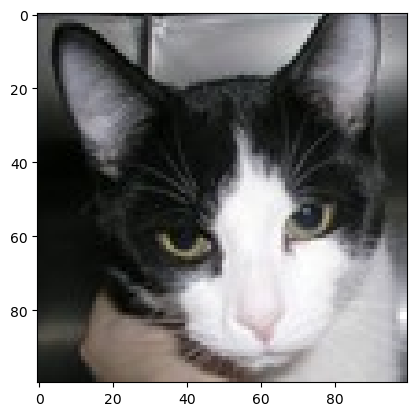

In [ ]:
idx = random.randint(2, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\sweth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
0model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.6184 - loss: 0.6432
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.6950 - loss: 0.5929
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 340ms/step - accuracy: 0.6884 - loss: 0.5847
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.7060 - loss: 0.5725
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step - accuracy: 0.7415 - loss: 0.5190
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.7422 - loss: 0.5029
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.7581 - loss: 0.4718
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step - accuracy: 0.8143 - loss: 0.3949
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.8255 - loss: 0.3776
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step - accuracy: 0.8590 - loss: 0.3315


In [ ]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7779 - loss: 0.5077


[0.6573069095611572, 0.6050000190734863]

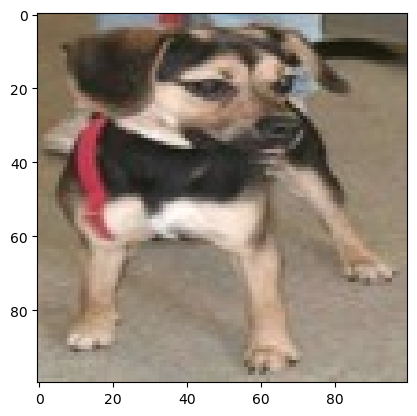

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Our model says it is a : dog


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)